In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('CreditScoring.csv')
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [4]:
df.columns = df.columns.str.lower()
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   status     4455 non-null   int64
 1   seniority  4455 non-null   int64
 2   home       4455 non-null   int64
 3   time       4455 non-null   int64
 4   age        4455 non-null   int64
 5   marital    4455 non-null   int64
 6   records    4455 non-null   int64
 7   job        4455 non-null   int64
 8   expenses   4455 non-null   int64
 9   income     4455 non-null   int64
 10  assets     4455 non-null   int64
 11  debt       4455 non-null   int64
 12  amount     4455 non-null   int64
 13  price      4455 non-null   int64
dtypes: int64(14)
memory usage: 487.4 KB


In [6]:
df.describe().round()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,1.0,8.0,3.0,46.0,37.0,2.0,1.0,2.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,0.0,8.0,2.0,15.0,11.0,1.0,0.0,1.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,0.0,0.0,6.0,18.0,0.0,1.0,0.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,1.0,2.0,2.0,36.0,28.0,2.0,1.0,1.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,1.0,5.0,2.0,48.0,36.0,2.0,1.0,1.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,2.0,12.0,4.0,60.0,45.0,2.0,1.0,3.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,2.0,48.0,6.0,72.0,68.0,5.0,2.0,4.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [7]:
(df[['income', 'assets', 'debt']]== 99999999.0).sum()

income    34
assets    47
debt      18
dtype: int64

In [8]:
df.isnull().sum()

status       0
seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

In [9]:
for col in ['income', 'assets', 'debt']:
    df[col] = df[col].replace(99999999.0, np.nan)

In [10]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [11]:
status_values = {
    1: 'ok', 
    2:'default', 
    0:'unknown'
    }
df.status = df.status.map(status_values)

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unknown'
}
df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unknown'
}
df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unknown'
}
df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unknown'
}
df.job = df.job.map(job_values)

df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4451,ok,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4452,default,0,owner,24,37,married,no,partime,60,90.0,3500.0,0.0,500,963
4453,ok,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


In [12]:
for col in df.columns:
    print(f'{col}',df[col].nunique())

status 3
seniority 47
home 7
time 11
age 50
marital 6
records 2
job 5
expenses 94
income 352
assets 159
debt 182
amount 285
price 1419


In [13]:
df.status.value_counts()

status
ok         3200
default    1254
unknown       1
Name: count, dtype: int64

In [14]:
df = df[ df.status != 'unknown'].reset_index( drop = True) 

In [15]:
df.status.value_counts()

status
ok         3200
default    1254
Name: count, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
y = df['status']
df = df.drop(columns=['status'])


In [18]:
df_full_train, df_test, y_full_train, y_test = train_test_split(
    df, y,
    test_size=0.2,
    stratify=y,
    random_state=11
)

In [19]:
df_train, df_val, y_train, y_val = train_test_split(
    df_full_train, y_full_train,
    test_size=0.25, 
    stratify=y_full_train,
    random_state=11
)

In [20]:
for col in ['income', 'assets', 'debt']:
    mean = df_train[col].mean()
    median = df_train[col].median()
    print(f'{col}\nmean: {mean:.2f}\nmedian: {median}')

income
mean: 130.95
median: 120.0
assets
mean: 5492.59
median: 3000.0
debt
mean: 330.69
median: 0.0


In [21]:
for col in ['income', 'assets', 'debt']:
    median = df_train[col].median()
    df_train[col] = df_train[col].fillna(median)
    df_val[col] = df_val[col].fillna(median)
    df_test[col] = df_test[col].fillna(median)


In [22]:
for col in df.columns:
    print(f'{col}',df[col].nunique())

seniority 47
home 7
time 11
age 50
marital 6
records 2
job 5
expenses 94
income 352
assets 159
debt 182
amount 285
price 1419


In [23]:
cat_cols = ['home', 'marital', 'job', 'records']
df_train = pd.get_dummies(df_train, columns=cat_cols, drop_first=True, dtype=int)
df_val = pd.get_dummies(df_val, columns=cat_cols, drop_first=True, dtype=int)
df_test = pd.get_dummies(df_test, columns=cat_cols, drop_first=True, dtype=int)

    
df_val = df_val.reindex(columns=df_train.columns, fill_value=0)
df_test = df_test.reindex(columns=df_train.columns, fill_value=0)


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y_train)

y_train = le.transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)


In [25]:
print(le.classes_)
print(le.transform(['default', 'ok']))

['default' 'ok']
[0 1]


In [26]:
df_train.columns

Index(['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt',
       'amount', 'price', 'home_other', 'home_owner', 'home_parents',
       'home_private', 'home_rent', 'home_unknown', 'marital_married',
       'marital_separated', 'marital_single', 'marital_widow', 'job_freelance',
       'job_others', 'job_partime', 'job_unknown', 'records_yes'],
      dtype='object')

Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [28]:
dt = DecisionTreeClassifier(random_state=11)

In [29]:
dt.fit(df_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,11
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [30]:
y_val_probs = dt.predict_proba(df_val)[:,1]  

auc = roc_auc_score(y_val, y_val_probs)
print(f'AUC-ROC: {auc:.4f}')

AUC-ROC: 0.6620


In [31]:
max_depth = [3, 5, 6, 10]
min_samples_leaf=range(5, 300, 5)
scores=[]

for depth in max_depth:
    for leaf in min_samples_leaf:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf, random_state=11)
        dt.fit(df_train, y_train)

        y_prob_pred=dt.predict_proba(df_val)[:,1]
        auc = roc_auc_score(y_val, y_prob_pred)

        scores.append((depth, leaf, auc))

scores_df = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'AUC score'])
scores_df.sort_values(by='AUC score', ascending=False)

,max_depth,min_samples_leaf,AUC score
186,10,50,0.805061
124,6,35,0.801142
185,10,45,0.800398
127,6,50,0.800293
126,6,45,0.799847
...,...,...,...
54,3,275,0.737774
52,3,265,0.735832
53,3,270,0.735222
118,6,5,0.733245


(0.0, 200.0)

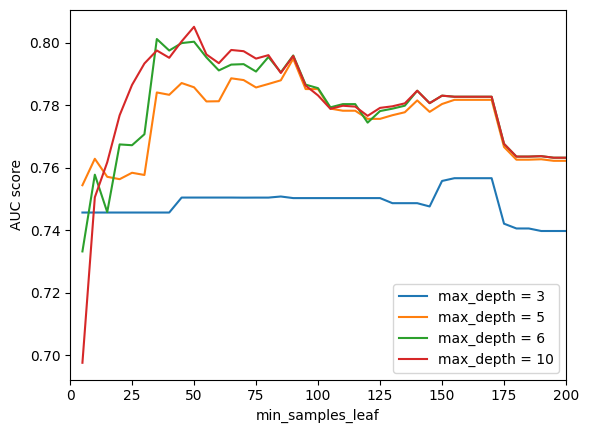

In [32]:
for depth in max_depth:
    subset = scores_df[scores_df['max_depth'] == depth]
    plt.plot(subset['min_samples_leaf'], subset['AUC score'], label='max_depth = %d' %depth)
plt.legend()
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC score')
plt.xlim(0, 200)

In [33]:
splits = [2, 5, 10, 20, 50, 60, 90, 100, 150, 200, 250, 300]
min_samples_leaf=range(10, 100, 10)
scores=[]

for leaf in min_samples_leaf:
    for split in splits:
        dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=leaf, min_samples_split=split, random_state=11)
        dt.fit(df_train, y_train)

        y_prob_pred=dt.predict_proba(df_val)[:,1]
        auc = roc_auc_score(y_val, y_prob_pred)

        scores.append((leaf, split, auc))

scores_df = pd.DataFrame(scores, columns=['min_samples_leaf', 'min_samples_split', 'AUC score'])
scores_df.sort_values(by='AUC score', ascending=False)

,min_samples_leaf,min_samples_split,AUC score
48,50,2,0.805061
49,50,5,0.805061
50,50,10,0.805061
51,50,20,0.805061
52,50,50,0.805061
...,...,...,...
10,10,250,0.770462
3,10,20,0.750545
2,10,10,0.750545
1,10,5,0.750545


(0.0, 200.0)

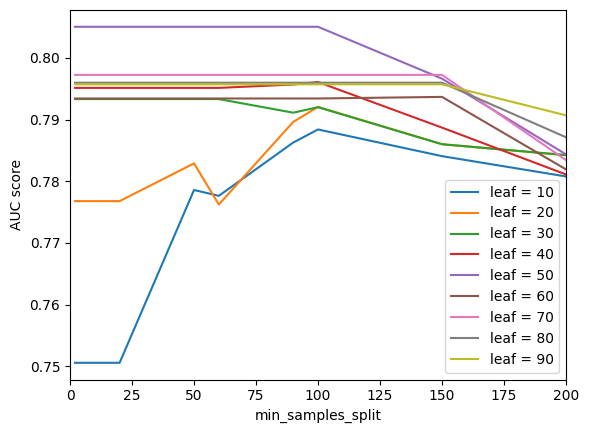

In [34]:
for leaf in min_samples_leaf:
    subset = scores_df[scores_df['min_samples_leaf'] == leaf]
    plt.plot(subset['min_samples_split'], subset['AUC score'], label='leaf = %d' %leaf)
plt.legend()
plt.xlabel('min_samples_split')
plt.ylabel('AUC score')
plt.xlim(0, 200)

In [35]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=50)
dt.fit(df_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,50
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [36]:
y_train_pred = dt.predict_proba(df_train)[:, 1]
auc = roc_auc_score(y_train, y_train_pred)
print('train: ', auc)

y_val_pred = dt.predict_proba(df_val)[:, 1] 
auc = roc_auc_score(y_val, y_val_pred) 
print('val: ', auc) 

train:  0.8438438469636526
val:  0.8051170318725099


In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    dt, df_train, y_train,
    cv=5,  
    scoring='roc_auc'  
)

print('AUC scores for each fold:', scores)
print('Mean AUC:', scores.mean())
print('Std AUC:', scores.std())


AUC scores for each fold: [0.77330815 0.79133899 0.75674479 0.78690104 0.81381944]
Mean AUC: 0.7844224843635026
Std AUC: 0.01901444489055493


Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier(random_state=11)

In [40]:
rf.fit(df_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
y_train_pred = rf.predict_proba(df_train)[:, 1]
auc = roc_auc_score(y_train, y_train_pred)
print(f'train: auc={auc:.4f}')

y_val_pred = rf.predict_proba(df_val)[:, 1] 
auc = roc_auc_score(y_val, y_val_pred) 

print(f'val: auc={auc:.4f} ')

train: auc=1.0000
val: auc=0.8320 


In [42]:
max_depth = [3,5,10,20]
n_estimators = range(10, 300, 10)
results=[]

for depth in max_depth:
    for n_est in n_estimators:
        rf = RandomForestClassifier(max_depth=depth, n_estimators=n_est, random_state=11)
        rf.fit(df_train, y_train)

        y_pred_prob = rf.predict_proba(df_val)[:,1]
        auc = roc_auc_score(y_val, y_pred_prob)

        results.append((depth, n_est, auc))

results_df= pd.DataFrame(results, columns=(['max_depth', 'n_estimators', 'AUC scores']))
results_df.sort_values(by='AUC scores', ascending=False).head(10)

,max_depth,n_estimators,AUC scores
86,10,290,0.836597
85,10,280,0.836429
84,10,270,0.836336
81,10,240,0.835751
72,10,150,0.835745
80,10,230,0.835352
83,10,260,0.835334
76,10,190,0.835141
73,10,160,0.835091
82,10,250,0.835010


Text(0, 0.5, 'AUC score')

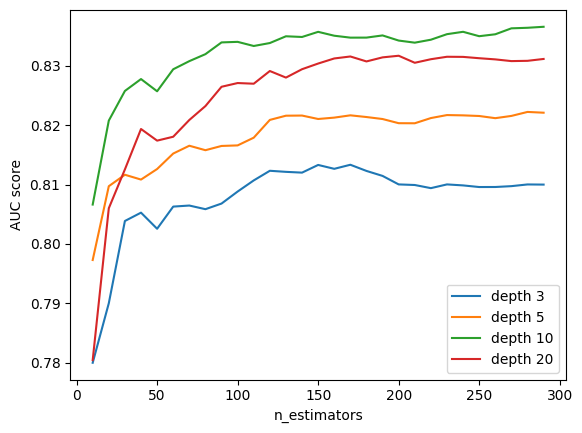

In [43]:
for depth in max_depth:
    subset= results_df[results_df['max_depth'] == depth]
    plt.plot(subset['n_estimators'], subset['AUC scores'], label= 'depth %d' %depth)
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('AUC score')

In [44]:
rf = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=11)
rf.fit(df_train, y_train)

y_train_pred = rf.predict_proba(df_train)[:, 1]
auc = roc_auc_score(y_train, y_train_pred)
print(f'train: auc={auc:.4f}')

y_val_pred = rf.predict_proba(df_val)[:, 1] 
auc = roc_auc_score(y_val, y_val_pred) 
print(f'val: auc={auc:.4f}')

train: auc=0.9766
val: auc=0.8341


In [45]:
min_samples_leaf = [2, 5, 6, 7, 8, 9, 10, 20, 30]
scores = []

for leaf in min_samples_leaf:
    rf = RandomForestClassifier(max_depth=10, n_estimators=100, min_samples_leaf=leaf, random_state=11)
    rf.fit(df_train, y_train)

    y_pred_prob = rf.predict_proba(df_val)[:,1]
    auc = roc_auc_score(y_val, y_pred_prob)
    scores.append((leaf, auc))
    
scores_df = pd.DataFrame(scores, columns=['min_samples_leaf', 'AUC score'])
scores_df.sort_values(by='AUC score', ascending=False)

,min_samples_leaf,AUC score
3,7,0.836348
0,2,0.835377
1,5,0.835047
6,10,0.833491
4,8,0.832682
2,6,0.832595
5,9,0.831978
7,20,0.827366
8,30,0.825112


In [46]:
min_samples_leaf = [2, 5, 7, 10, 20]
splits = range(5, 55, 1)
results=[]

for leaf in min_samples_leaf:
    for split in splits:
        rf = RandomForestClassifier(max_depth=10, n_estimators=100, min_samples_leaf=leaf, min_samples_split=split, random_state=11)
        rf.fit(df_train, y_train)

        y_pred_prob = rf.predict_proba(df_val)[:,1]
        auc = roc_auc_score(y_val, y_pred_prob)

        results.append((leaf, split, auc))

results_df= pd.DataFrame(results, columns=(['leaf', 'split', 'AUC scores']))
results_df.sort_values(by='AUC scores', ascending=False).head(10)

,leaf,split,AUC scores
7,2,12,0.838253
145,7,50,0.837326
149,7,54,0.837133
15,2,20,0.836902
6,2,11,0.836877
3,2,8,0.836840
148,7,53,0.836610
12,2,17,0.836467
100,7,5,0.836348
104,7,9,0.836348


Text(0, 0.5, 'AUC score')

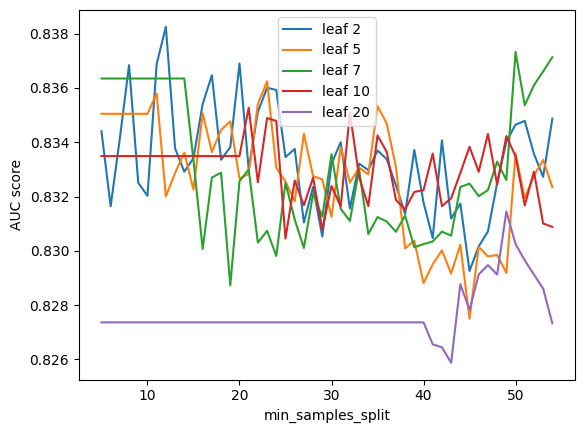

In [47]:
for leaf in min_samples_leaf:
    subset= results_df[results_df['leaf'] == leaf]
    plt.plot(subset['split'], subset['AUC scores'], label= 'leaf %d' %leaf)
plt.legend()
plt.xlabel('min_samples_split')
plt.ylabel('AUC score')

In [48]:
rf = RandomForestClassifier(max_depth=10, n_estimators=100, min_samples_leaf=2, min_samples_split=12, random_state=11)
rf.fit(df_train, y_train)
scores = cross_val_score(
    rf, df_train, y_train,
    cv=5,  # broj foldova
    scoring='roc_auc'  # koristimo roc_auc kao metriku
)

print('AUC scores for each fold:', scores)
print('Mean AUC:', scores.mean())
print('Std AUC:', scores.std())

AUC scores for each fold: [0.84135279 0.83045323 0.82585069 0.83921875 0.84138889]
Mean AUC: 0.8356528697571743
Std AUC: 0.0063439007556811665


XGBoost

In [49]:
from xgboost import XGBClassifier

In [50]:
learning_rate = [0.05, 0.07, 0.08, 0.09, 0.1, 0.2]
max_depth = range(0, 30, 1)
results=[]

for rate in learning_rate:
    for depth in max_depth:
        xgb = XGBClassifier(learning_rate=rate, max_depth=depth, random_state=11)
        xgb.fit(df_train, y_train)

        y_pred_prob = xgb.predict_proba(df_val)[:,1]
        auc = roc_auc_score(y_val, y_pred_prob)

        results.append((rate, depth, auc))

results_df= pd.DataFrame(results, columns=(['learning_rate', 'max_depth', 'AUC scores']))
results_df.sort_values(by='AUC scores', ascending=False).head(5)

,learning_rate,max_depth,AUC scores
152,0.20,2,0.846819
153,0.20,3,0.839623
122,0.10,2,0.838287
93,0.09,3,0.838091
92,0.09,2,0.838029


Text(0, 0.5, 'AUC score')

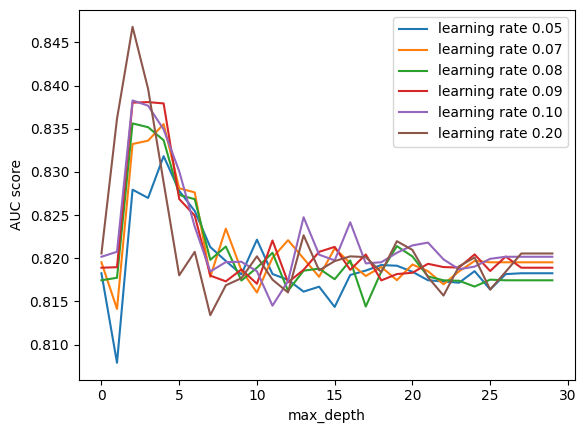

In [51]:
for rate in learning_rate:
    subset= results_df[results_df['learning_rate'] == rate]
    plt.plot(subset['max_depth'], subset['AUC scores'], label= 'learning rate %.2f' %rate)
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('AUC score')

In [52]:
xgb = XGBClassifier(learning_rate=0.2, max_depth=2, random_state=11)
xgb.fit(df_train, y_train)

y_train_pred = xgb.predict_proba(df_train)[:, 1]
auc = roc_auc_score(y_train, y_train_pred)
print(f'train: auc={auc:.4f}')

y_val_pred = xgb.predict_proba(df_val)[:, 1] 
auc = roc_auc_score(y_val, y_val_pred) 
print(f'val: auc={auc:.4f}')

train: auc=0.8986
val: auc=0.8468


     min_child_weight  n_estimators  AUC scores
115                20           150    0.847429
55                  5           150    0.847392
96                 15           160    0.847342
118                20           180    0.847018
117                20           170    0.846863


(0.8, 0.85)

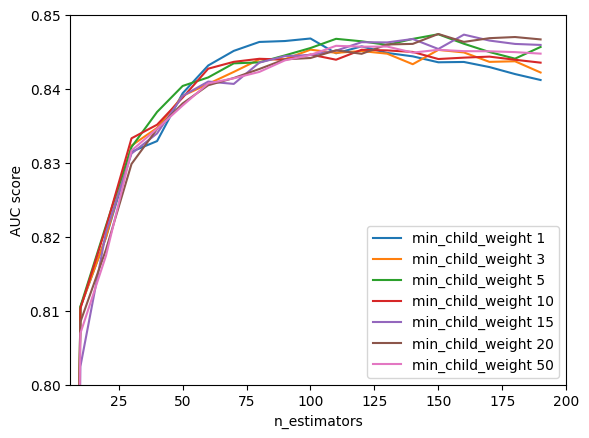

In [53]:
min_child_weight = [1, 3, 5, 10, 15, 20, 50]
n_estimators = range(0 ,200, 10)
results=[]

for child_weight in min_child_weight:
    for n_est in n_estimators:
        xgb = XGBClassifier(learning_rate=0.2, max_depth=2, min_child_weight=child_weight, n_estimators=n_est, random_state=11)
        xgb.fit(df_train, y_train)

        y_pred_prob = xgb.predict_proba(df_val)[:,1]
        auc = roc_auc_score(y_val, y_pred_prob)

        results.append((child_weight, n_est, auc))

results_df= pd.DataFrame(results, columns=(['min_child_weight', 'n_estimators', 'AUC scores']))
print(results_df.sort_values(by='AUC scores', ascending=False).head(5))

for child_weight in min_child_weight:
    subset= results_df[results_df['min_child_weight'] == child_weight]
    plt.plot(subset['n_estimators'], subset['AUC scores'], label= 'min_child_weight %d' %child_weight)
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('AUC score')
plt.xlim(6, 200)
plt.ylim(0.80, 0.85)

In [54]:
xgb = XGBClassifier(learning_rate=0.2, max_depth=2, n_estimators=150, min_child_weight=20, random_state=11)
xgb.fit(df_train, y_train)

y_train_pred = xgb.predict_proba(df_train)[:, 1]
auc = roc_auc_score(y_train, y_train_pred)
print(f'train: auc={auc:.4f}')

y_val_pred = xgb.predict_proba(df_val)[:, 1] 
auc = roc_auc_score(y_val, y_val_pred) 
print(f'val: auc={auc:.4f}')

train: auc=0.8925
val: auc=0.8474


    colsample_bytree  subsample_value  AUC scores
49               0.8              0.5    0.849533
48               0.8              0.4    0.849328
41               0.7              0.8    0.848755
64               1.0              0.9    0.848581
29               0.6              0.7    0.848033


(0.82, 0.85)

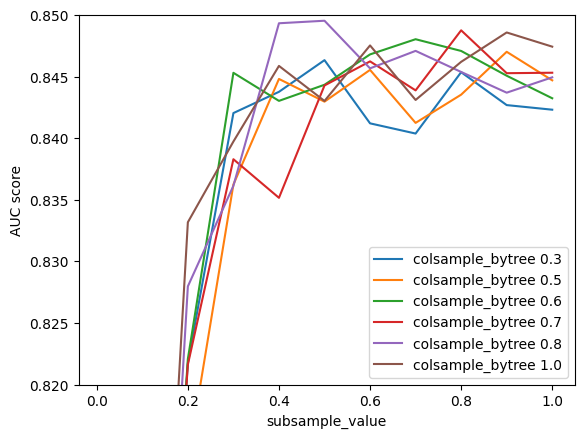

In [55]:
colsample_bytree = [0.3, 0.5, 0.6, 0.7, 0.8, 1.0 ]
subsample_value=[0.01, 0.1, 0.2, 0.3, 0.4 ,0.5, 0.6, 0.7, 0.8, 0.9, 1]
results=[]

for colsample in colsample_bytree:
    for subsample in subsample_value:
        xgb = XGBClassifier(learning_rate=0.2, max_depth=2, n_estimators=150, min_child_weight=20, colsample_bytree= colsample, subsample = subsample, random_state=11)
        xgb.fit(df_train, y_train)

        y_pred_prob = xgb.predict_proba(df_val)[:,1]
        auc = roc_auc_score(y_val, y_pred_prob)

        results.append((colsample, subsample, auc))

results_df= pd.DataFrame(results, columns=(['colsample_bytree', 'subsample_value', 'AUC scores']))
print(results_df.sort_values(by='AUC scores', ascending=False).head(5))

for colsample in colsample_bytree:
    subset= results_df[results_df['colsample_bytree'] == colsample]
    plt.plot(subset['subsample_value'], subset['AUC scores'], label= 'colsample_bytree %.1f' %colsample)
plt.legend()
plt.xlabel('subsample_value')
plt.ylabel('AUC score')
plt.ylim(0.82, 0.85)

    colsample_bytree  subsample_value  AUC scores
19               0.7              0.8    0.848755
31               1.0              0.9    0.848581
28               1.0              0.6    0.847529
32               1.0              1.0    0.847429
9                0.5              0.9    0.847012


(0.82, 0.85)

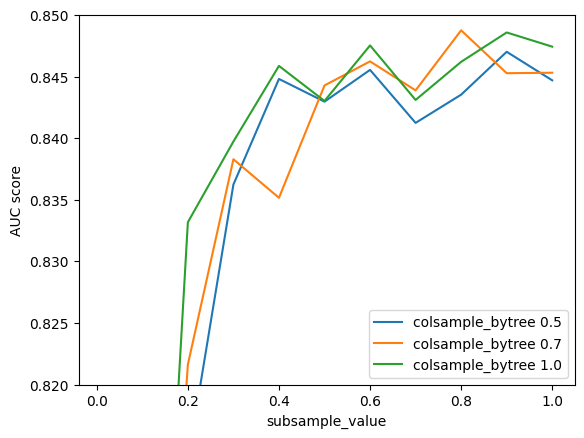

In [56]:
colsample_bytree = [0.5,0.7, 1.0 ]
subsample_value=[0.01, 0.1, 0.2, 0.3, 0.4 ,0.5, 0.6, 0.7, 0.8, 0.9, 1]
results=[]

for colsample in colsample_bytree:
    for subsample in subsample_value:
        xgb = XGBClassifier(learning_rate=0.2, max_depth=2, n_estimators=150, min_child_weight=20, colsample_bytree= colsample, subsample = subsample, random_state=11)
        xgb.fit(df_train, y_train)

        y_pred_prob = xgb.predict_proba(df_val)[:,1]
        auc = roc_auc_score(y_val, y_pred_prob)

        results.append((colsample, subsample, auc))

results_df= pd.DataFrame(results, columns=(['colsample_bytree', 'subsample_value', 'AUC scores']))
print(results_df.sort_values(by='AUC scores', ascending=False).head(5))

for colsample in colsample_bytree:
    subset= results_df[results_df['colsample_bytree'] == colsample]
    plt.plot(subset['subsample_value'], subset['AUC scores'], label= 'colsample_bytree %.1f' %colsample)
plt.legend()
plt.xlabel('subsample_value')
plt.ylabel('AUC score')
plt.ylim(0.82, 0.85)

In [57]:
results_df = results_df.sort_values(by='AUC scores', ascending=False).head(5)
results_df

,colsample_bytree,subsample_value,AUC scores
19,0.7,0.8,0.848755
31,1.0,0.9,0.848581
28,1.0,0.6,0.847529
32,1.0,1.0,0.847429
9,0.5,0.9,0.847012


In [58]:
results= []

for i in range(0, 5):
        xgb = XGBClassifier(learning_rate = 0.2, max_depth=2, n_estimators = 150, min_child_weight=20, colsample_bytree=results_df.iloc[i, 0], subsample=results_df.iloc[i, 1], random_state=11)
        xgb.fit(df_train, y_train)

        y_train_pred = xgb.predict_proba(df_train)[:, 1]
        auc_train = roc_auc_score(y_train, y_train_pred)

        y_val_pred = xgb.predict_proba(df_val)[:, 1] 
        auc_val = roc_auc_score(y_val, y_val_pred) 

        results.append((results_df.iloc[i, 0], results_df.iloc[i, 1], auc_train, auc_val, (auc_train-auc_val)*1000))

auc_acc_results_df = pd.DataFrame(results, columns = ['colsample_bytree', 'subsample', 'auc_train', 'auc_val', 'auc_train-auc_val'])
auc_acc_results_df
       

,colsample_bytree,subsample,auc_train,auc_val,auc_train-auc_val
0,0.7,0.8,0.890592,0.848755,41.837468
1,1.0,0.9,0.894492,0.848581,45.911441
2,1.0,0.6,0.889342,0.847529,41.813674
3,1.0,1.0,0.892536,0.847429,45.107189
4,0.5,0.9,0.889098,0.847012,42.085870


In [59]:
xgb=XGBClassifier(learning_rate = 0.2, max_depth=2, n_estimators=150, min_child_weight=20, colsample_bytree=1, subsample=0.6, random_state=11)
xgb.fit(df_train, y_train)
scores = cross_val_score(
    xgb, df_train, y_train,
    cv=5,  # broj foldova
    scoring='roc_auc'  # koristimo roc_auc kao metriku
)

print('AUC scores for each fold:', scores)
print('Mean AUC:', scores.mean())
print('Std AUC:', scores.std())

AUC scores for each fold: [0.83959368 0.83707575 0.84244792 0.83019097 0.84743056]
Mean AUC: 0.8393477740986018
Std AUC: 0.005727335277642715


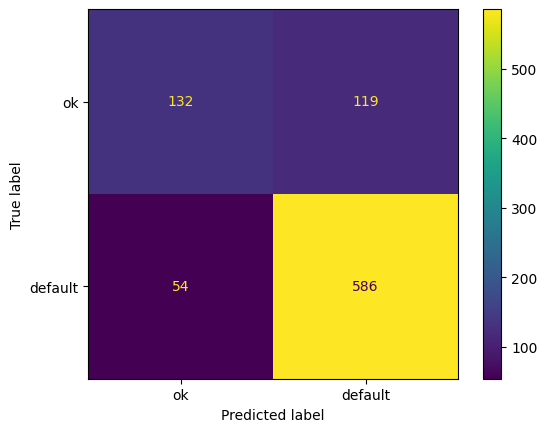

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
xgb = XGBClassifier(
            learning_rate=0.2,
            max_depth=2,
            min_child_weight=20,
            n_estimators=150,
            colsample_bytree=1,
            subsample=0.6,
            random_state=11,
            n_jobs=-1
        )
xgb.fit(df_train, y_train)
y_pred = xgb.predict(df_val)

cm = confusion_matrix(y_val, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ok', 'default'])
disp.plot()

Choosing the best model

In [61]:
# Decision Tree
dt_final = DecisionTreeClassifier(max_depth=10, min_samples_leaf=50)
dt_final.fit(df_train, y_train)

y_val_pred_dt = dt_final.predict_proba(df_val)[:, 1]
auc_dt = roc_auc_score(y_val, y_val_pred_dt)
print(f"Decision Tree AUC-ROC: {auc_dt:.4f}")

# Random Forest
rf_final = RandomForestClassifier(max_depth=10, n_estimators=100, min_samples_leaf=2, min_samples_split=12, random_state=11)
rf_final.fit(df_train, y_train)

y_val_pred_rf = rf_final.predict_proba(df_val)[:, 1]
auc_rf = roc_auc_score(y_val, y_val_pred_rf)
print(f"Random Forest AUC-ROC: {auc_rf:.4f}")

# XGBoost
xgb_final = XGBClassifier(learning_rate=0.2, max_depth=2, n_estimators=150, min_child_weight=20, colsample_bytree=1, subsample=0.6, random_state=11)
xgb_final.fit(df_train, y_train) 

y_val_pred_xgb = xgb_final.predict_proba(df_val)[:, 1]
auc_xgb = roc_auc_score(y_val, y_val_pred_xgb)
print(f"XGBoost AUC-ROC: {auc_xgb:.4f}")

Decision Tree AUC-ROC: 0.8051
Random Forest AUC-ROC: 0.8383
XGBoost AUC-ROC: 0.8475


Test

In [62]:
df_full_train = pd.concat([df_train, df_val], ignore_index=True)
y_train_df = pd.DataFrame(y_train, columns=['status'])
y_val_df = pd.DataFrame(y_val, columns=['status'])
y_full_train = pd.concat([y_train_df, y_val_df], ignore_index=True)['status']

In [63]:
# XGBoost
xgb_final = XGBClassifier(learning_rate=0.2,
                          max_depth=2,
                          n_estimators = 150,
                          min_child_weight=20,
                          colsample_bytree=1,
                          subsample=0.6,
                          random_state=11,
                          n_jobs=-1)
xgb_final.fit(df_full_train, y_full_train) 

y_test_pred_xgb = xgb_final.predict_proba(df_test)[:, 1]
auc_xgb = roc_auc_score(y_test, y_test_pred_xgb)
print(f"XGBoost AUC-ROC: {auc_xgb:.4f}")

XGBoost AUC-ROC: 0.8401


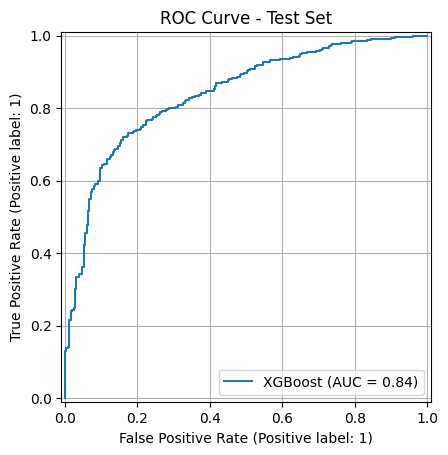

In [65]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(xgb_final, df_test, y_test, name='XGBoost')

plt.title("ROC Curve - Test Set")
plt.grid()
plt.show()
